# Tensorflow - 이미지 분류 (CNN)

https://opentutorials.org/module/5268

https://www.youtube.com/playlist?list=PLl1irxoYh2wzOOU9hvJqMYc215wAlxrpp

2022-03-31

---

### 데이터와 차원

### 차원 (2가지 해석이 가능)

1. 표의 의 열 (= 관측치의 차원에서)
 - 습도, 온도, 판매 => 3차원 그래프
 - 관측치 = N차원 공간의 한점
 - 변수의 개수 = 공간의 차원수

2. 포함 관계

 - 배열의 깊이 (.shape)
 - 1차원 형태 : (4, )
 - 2차원 형태 : (3, 4)
 - 흑백 이미지는 2차원 형태
 - 이미지 셋 => 3차원 형태 (3, 2, 2)

이러한 여러 차원으로 구성된 데이터 모습을 = tensor 

3. 정리
- 데이터 공간의 맥락
    - 차원수 = 변수의 개수
#
- 데이터 형태의 맥락
    - 차원수 = 배열의 깊이

---

### 차원연습

In [1]:
import numpy as np

# 1차원
d1 = np.array([1, 2, 3])
print(d1.ndim , d1.shape)

# 2차원
d2 = np.array([d1, d1, d1, d1, d1])
print(d2.ndim , d2.shape)

# 3차원
d3 = np.array([d2, d2, d2, d2])
print(d2.ndim , d3.shape)

# 4차원
d4 = np.array([d3,d3])
print(d4.ndim, d4.shape)

1 (3,)
2 (5, 3)
2 (4, 5, 3)
4 (2, 4, 5, 3)


---

In [2]:
import tensorflow as tf

# mnist 데이터 불러와서 train/test 나누기
(x_train, y_train),(x_test, y_test) = tf.keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


In [3]:
# 28 by 28 픽셀 이미지 6만장 / 1만장
print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

(60000, 28, 28) (10000, 28, 28)
(60000,) (10000,)


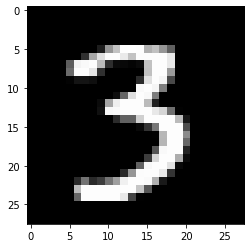

In [6]:
import matplotlib.pyplot as plt

# 데이터셋 이미지 확인하기
plt.imshow(x_train[10000], cmap='gray')

In [7]:
import pandas as pd

# 표로 이미지 보기
pd.DataFrame(x_train[10000])


,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,29,...,96,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,48,166,224,...,233,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,93,244,249,253,187,...,233,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,107,253,253,230,48,...,156,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,3,20,20,15,0,...,74,0,0,0,0,0,0,0,0,0


### (흑백) Mnist 이미지

28, 28 칸으로 설명, 0은 흑색, 255는 백색에 가까운 칸 (농도를 숫자로 표시)

28 * 28 = 784칸이므로, 

**2차원 형태, 784차원 공간의 한 점**

but 컬러 사진의 경우



### (컬러) cifar10 이미지 set

(32, 32, 3) <= 로 표현 : RGB  
32*32 칸을 가진 사진 3장을 겹쳤다고 생각하면 된다. (각 칸에 3개의 정보를 가짐)

이미지 하나에 (32*32*3 = 3072) 개의 숫자가 들어있다.

이는 3072 차원의 한 점으로 표현 된다. 

- 보통 이미지 크기 2448 x 3264 라면, 2448 x 3264 * 3 이 된다.
- 컴퓨터는 이런 이미지를 그림이 아닌, 23,970,816개의 숫자로 인식 하게 된다.

---

### 이미지 실습

In [8]:
import tensorflow as tf
# https://www.cs.toronto.edu/~kriz/cifar.html

# cifar10 데이터 가져오기
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

170500096/170498071 [==============================] - 33s 0us/step


In [9]:
print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

(50000, 32, 32, 3) (10000, 32, 32, 3)
(50000, 1) (10000, 1)


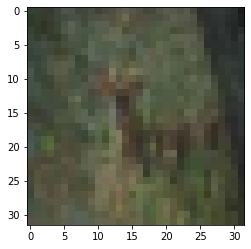

In [10]:
import matplotlib.pyplot as plt

plt.imshow(x_train[10])

---

## Flatten

CNN LeNet (손글씨 인식)

<img src="./img/c1.png" width=100% height=100%>




In [ ]:
### 영상 클론 코딩

# 1.과거의 데이터를 준비
(독립, 종속), _ = tf.keras.datasets.mnist.load_data()

# (60000, 28, 28) 의 이미지를 (60000, 784) 인 2차원 표에 한줄로 넣어준다.
독립 = 독립.reshape(60000, 784) # 784 갯수 주의
종속 = pd.get_dummies(종속) # 원핫인코딩
print(독립.shpae, 종속.shape)

# 2. 모델의 구조를 만듭니다.
X = tf.keras.layers.Input(shape=[784])
H = tf.keras.layers.Dense(84, acrivation='swish')(X)
Y = tf.keras.layers.Dense(10, activation='softmax')(H)
model = tf.keras.models.Model(X, Y)
model.complie(loss='scategorical_corssentropy', merics='accuracy')

# 3. 데이터로 모델을 학습(FIT)합니다.
model.fit(독립, 종속, epochs=10)

# 4. 모델을 이용합니다.
print("Predictions : ", model.predict(독립[0:5]))


In [12]:
import pandas as pd
import numpy as np

In [13]:
## 실제 실습

# 1.과거의 데이터를 준비
(x_train, y_train),(x_test, y_test) = tf.keras.datasets.mnist.load_data()
print(x_train.shape , y_train.shape)

# reshape
x_train = x_train.reshape(60000, 784)

# 원핫인코딩
y_train = pd.get_dummies(y_train)

print(x_train.shape , y_train.shape)

(60000, 28, 28) (60000,)
(60000, 784) (60000, 10)


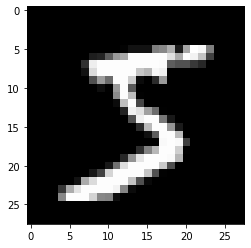

In [14]:
import matplotlib.pyplot as plt

# plt.imshow(x_train[0]) 
# 이미지를 784로 reshape 해줬기 때문에 오류. 다시 보려면 reshape을 해줘야 한다.

plt.imshow(x_train[0].reshape(28, 28), cmap='gray')

In [15]:
# 모델 준비하기

X = tf.keras.layers.Input(shape=[784])
Y = tf.keras.layers.Dense(10, activation='softmax')(X)
model = tf.keras.models.Model(X, Y)
model.compile(loss='categorical_crossentropy', metrics='accuracy')

model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense (Dense)                (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [16]:
# 모델 학습하기
model.fit(x_train, y_train, epochs=10, batch_size=100)

Epoch 1/10
600/600 [==============================] - 2s 2ms/step - loss: 11.2852 - accuracy: 0.8192
Epoch 2/10
600/600 [==============================] - 1s 2ms/step - loss: 5.3863 - accuracy: 0.8747
Epoch 3/10
600/600 [==============================] - 1s 2ms/step - loss: 4.7102 - accuracy: 0.8802
Epoch 4/10
600/600 [==============================] - 2s 3ms/step - loss: 4.3246 - accuracy: 0.8829
Epoch 5/10
600/600 [==============================] - 1s 2ms/step - loss: 4.1296 - accuracy: 0.8821
Epoch 6/10
600/600 [==============================] - 2s 3ms/step - loss: 3.9398 - accuracy: 0.8846
Epoch 7/10
600/600 [==============================] - 1s 2ms/step - loss: 3.8278 - accuracy: 0.8838
Epoch 8/10
600/600 [==============================] - 1s 2ms/step - loss: 3.7180 - accuracy: 0.8857
Epoch 9/10
600/600 [==============================] - 1s 2ms/step - loss: 3.6771 - accuracy: 0.8860
Epoch 10/10
600/600 [==============================] - 1s 2ms/step - loss: 3.6375 - accuracy: 0.885

In [18]:
# 모델 이용하기
model.predict(x_train[0:5])

# 결과 해석

'''
1. (6번째) 5 일 확률 9.9998736e-01
2. (1번째) 0 일 확률 1.0000000e+00
3. (5번째) 4 일 확률 1.0000000e+00
4. (2번째) 1 일 확률 1.0000000e+00
5. (10번째) 9 일 확률 1.0000000e+00
''';

In [19]:
# 확인
y_train[0:5]

,0,1,2,3,4,5,6,7,8,9
0,0,0,0,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1


모델 변형 Flatten

In [ ]:
### 영상 클론 코딩

# 1.과거의 데이터를 준비
(독립, 종속), _ = .tf.keras.datasets.mnist.load_data()

# # (60000, 28, 28) 의 이미지를 (60000, 784) 인 2차원 표에 한줄로 넣어준다.
# 독립 = 독립.reshape(60000, 784) # 784 갯수 주의

종속 = pd.get_dummies(종속)
print(독립.shpae, 종속.shape)

# 2. 모델의 구조를 만듭니다.
X = tf.keras.layers.Input(shape=[28, 28])
H = tf.keras.layers.Flatten()(X) ## 추가된 부분
H = tf.keras.layers.Dense(84, acrivation='swish')(H) ## X 대신 H 로 바꾸어 준다.
Y = tf.keras.layers.Dense(10, activation='softmax')(H)
model = tf.keras.models.Model(X, Y)
model.complie(loss='scategorical_corssentropy', merics='accuracy')

# 3. 데이터로 모델을 학습(FIT)합니다.
model.fit(독립, 종속, epochs=10)

# 4. 모델을 이용합니다.
print("Predictions : ", model.predict(독립[0:5]))

In [31]:
## 실제 실습

# 1.과거의 데이터를 준비
(x_train, y_train),(x_test, y_test) = tf.keras.datasets.mnist.load_data()
print(x_train.shape , y_train.shape)
print(x_test.shape, y_test.shape)

# 텐서플로우 원핫인코딩
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)
(60000, 28, 28) (60000, 10)
(10000, 28, 28) (10000, 10)


### 원핫 인코딩 차이 (장단)
- pandas 의 get_dummies 
    - 문자열도 원핫인코딩 해준다.
    - 컬럼 내에 있는 범주들로만 원핫인코딩이 된다. (아이리스 3종이면, 인코딩이 3개로 됨, 4개 안됨)
#
- teshorflow 의 to_categorical
    - 0부터 시작하는 숫자로 된 범주만 원핫인코딩 할 수 있다.
    - 내 이미지는 0~8 까지 밖에 없지만, 9를 포함해 클래스를 만들고 인코딩 할수 있다.

In [40]:
# 모델의 구조를 만들기
X = tf.keras.layers.Input(shape=[28, 28])

H = tf.keras.layers.Flatten()(X) ## 추가된 부분

H = tf.keras.layers.Dense(84, activation='swish')(H) ## X 대신 H 로 바꾸어 준다.
Y = tf.keras.layers.Dense(10, activation='softmax')(H)
model = tf.keras.models.Model(X, Y)
model.compile(loss='categorical_crossentropy', metrics='accuracy')

model.summary()

Model: "model_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_14 (InputLayer)        [(None, 28, 28)]          0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_19 (Dense)             (None, 84)                65940     
_________________________________________________________________
dense_20 (Dense)             (None, 10)                850       
Total params: 66,790
Trainable params: 66,790
Non-trainable params: 0
_________________________________________________________________


In [42]:
# 모델 핏
model.fit(x_train, y_train, epochs=50, batch_size=100)

Epoch 1/50
600/600 [==============================] - 2s 3ms/step - loss: 0.1737 - accuracy: 0.9683
Epoch 2/50
600/600 [==============================] - 2s 3ms/step - loss: 0.1629 - accuracy: 0.9689
Epoch 3/50
600/600 [==============================] - 2s 3ms/step - loss: 0.1600 - accuracy: 0.9707
Epoch 4/50
600/600 [==============================] - ETA: 0s - loss: 0.1531 - accuracy: 0.97 - 2s 3ms/step - loss: 0.1528 - accuracy: 0.9713
Epoch 5/50
600/600 [==============================] - 2s 3ms/step - loss: 0.1424 - accuracy: 0.9730
Epoch 6/50
600/600 [==============================] - 2s 3ms/step - loss: 0.1386 - accuracy: 0.9746
Epoch 7/50
600/600 [==============================] - 2s 3ms/step - loss: 0.1375 - accuracy: 0.9745
Epoch 8/50
600/600 [==============================] - 2s 3ms/step - loss: 0.1375 - accuracy: 0.9756
Epoch 9/50
600/600 [==============================] - 2s 3ms/step - loss: 0.1290 - accuracy: 0.9767
Epoch 10/50
600/600 [==============================] - 2s 

In [43]:
# 테스트 데이터로 평가해보기
model.evaluate(x_test, y_test)


313/313 [==============================] - 1s 2ms/step - loss: 1.0303 - accuracy: 0.9649


[1.0303064584732056, 0.964900016784668]

---

### dataset
  - train(학습용)
  - validation(검증용) - 모의고사
  - test(시험용): 본고사(수능), 회사 면접

In [44]:
# 모델 피팅에 val 을 주면 됨

model.fit(x_train, y_train, epochs=10, batch_size=100, validation_split=0.2)

Epoch 1/10
480/480 [==============================] - 1s 3ms/step - loss: 0.0598 - accuracy: 0.9901 - val_loss: 0.0356 - val_accuracy: 0.9939
Epoch 2/10
480/480 [==============================] - 1s 3ms/step - loss: 0.0556 - accuracy: 0.9907 - val_loss: 0.0652 - val_accuracy: 0.9907
Epoch 3/10
480/480 [==============================] - 1s 3ms/step - loss: 0.0460 - accuracy: 0.9919 - val_loss: 0.0652 - val_accuracy: 0.9913
Epoch 4/10
480/480 [==============================] - 1s 3ms/step - loss: 0.0461 - accuracy: 0.9920 - val_loss: 0.0777 - val_accuracy: 0.9904
Epoch 5/10
480/480 [==============================] - 1s 3ms/step - loss: 0.0484 - accuracy: 0.9913 - val_loss: 0.1070 - val_accuracy: 0.9876
Epoch 6/10
480/480 [==============================] - 1s 3ms/step - loss: 0.0466 - accuracy: 0.9919 - val_loss: 0.1091 - val_accuracy: 0.9862
Epoch 7/10
480/480 [==============================] - 1s 3ms/step - loss: 0.0424 - accuracy: 0.9916 - val_loss: 0.0974 - val_accuracy: 0.9878
Epoch 

In [45]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 1.1515 - accuracy: 0.9660


[1.151517629623413, 0.9660000205039978]